Theta:  [20.04692057  2.48971532 22.76277055 -0.09954098  2.10212676  1.58283592
 -8.39396231  7.31574099  0.05130734 -1.35776322 -0.99222408  5.86859344]

Predicted values (Evaluated hypothesis function) for training data:  [25.98288969 32.61373219 27.8745902  25.8563544  27.57561236 26.46236518
 29.06819455 29.84476567 84.16974735 82.3492236  33.2957776  30.13518358
 32.36481642 32.02255193 31.49634246 29.84476567 39.1265951  43.51649205]

Predicted values (Evaluated hypothesis function) for test data:  [46.08761514 27.38335221 36.05912813 48.06849685 50.29069254 41.16484288
 49.0898144  27.61588988 39.72356493 63.18392837]

Train error:  27.239758783632222
Test error:  586.3818075939682


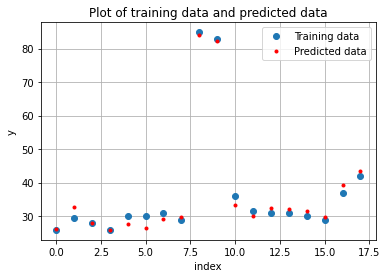

In [60]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

#Load train data
data = np.genfromtxt('Hogsmeade_Prices.csv',delimiter=',',skip_header=1)
row = data.shape[0]
col = data.shape[1]

#Extract the training data and test data
#(last 10 rows will be used as test data and rest as training data)
#Last column is used as target data (y)
#House ID (the first column) is just a serial number, not a feature, hence it is excluded from the feature list (x)
x_train = data[0:row-10,1:col-1]
y_train = data[0:row-10,col-1]

x_test = data[row-10:row, 1:col-1]
y_test = data[row-10:row, col-1]

#Form X and Y matrices for normal equation
X = np.vstack([np.ones(x_train.shape[0]), x_train.T]).T
Y = y_train

#Find theta array
theta = (np.linalg.inv((X.T).dot(X))).dot((X.T).dot(Y))
print("Theta: ", theta)

#Calculate the hypothesis function based on training data
h_train = theta.dot(X.T)
print("\nPredicted values (Evaluated hypothesis function) for training data: ", h_train)

#Calculate the hypothesis function based on test data
X_test = np.vstack([np.ones(x_test.shape[0]), x_test.T]).T
h_test = theta.dot(X_test.T)
print("\nPredicted values (Evaluated hypothesis function) for test data: ", h_test)

#Calculate average least squares error (cost function) for training data
J_train = 0.5 * np.sum((h_train - y_train)**2)
print("\nTrain error: ", J_train)

#Calculate average least squares error (cost function) for test data
J_test = 0.5 * np.sum((h_test - y_test)**2)
print("Test error: ",J_test)

plt.plot(y_train,'o', label = "Training data")
plt.plot(h_train,'r.', label = "Predicted data")

plt.legend()
plt.xlabel("index")
plt.ylabel("y")
plt.title("Plot of training data and predicted data")

plt.grid()
plt.show()




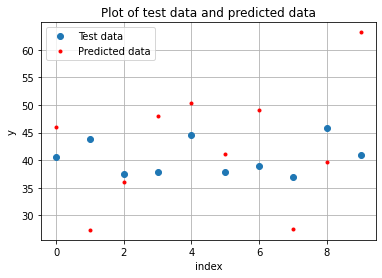

In [61]:
plt.plot(y_test,'o', label = "Test data")
plt.plot(h_test,'r.', label = "Predicted data")

plt.legend()
plt.xlabel("index")
plt.ylabel("y")
plt.title("Plot of test data and predicted data")

plt.grid()
plt.show()

In [62]:
#Find the minimum of absolute values of theta, to find the feature that has least effect on prediction
#Find the max for maximum effect on prediction
min = np.min(np.abs(theta))
max = np.max(np.abs(theta))
print("min :", min)
print("max :", max)

min : 0.05130733993775749
max : 22.762770552300026


Theta:  [22.50861666  2.54529555 20.62980335 -0.2760444   3.15104891  1.54142716
 -7.90310435  6.85630943 -1.21755292 -1.57170462  5.77285692]

Predicted values (Evaluated hypothesis function) for training data:  [26.26205711 32.06680453 28.46084351 25.7520209  27.7867659  25.6105424
 28.99768553 29.86482811 84.04814359 82.37477097 33.5004997  30.47345283
 32.02654717 32.22490515 31.35404816 29.86482811 39.10590457 43.82535174]

Predicted values (Evaluated hypothesis function) for test data:  [46.32645163 27.90881232 36.38126265 48.77401664 49.11113709 40.56059519
 48.07423846 28.78533353 40.53923691 63.17955503]

Train error:  28.21517251699303
Test error:  553.5627691257249


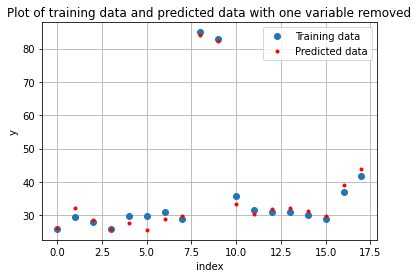

In [63]:
#linear regression excluding the variable "Age of Home" that has the least impact

x_train = data[0:row-10,1:col-1]
y_train = data[0:row-10,col-1]
x_train = np.delete(x_train,7,1)

x_test = data[row-10:row, 1:col-1]
y_test = data[row-10:row, col-1]
x_test = np.delete(x_test,7,1)

#Form X and Y matrices for normal equation
X = np.vstack([np.ones(x_train.shape[0]), x_train.T]).T
Y = y_train

#Find theta array
theta = (np.linalg.inv((X.T).dot(X))).dot((X.T).dot(Y))
print("Theta: ", theta)

#Calculate the hypothesis function based on training data
h_train = theta.dot(X.T)
print("\nPredicted values (Evaluated hypothesis function) for training data: ", h_train)

#Calculate the hypothesis function based on test data
X_test = np.vstack([np.ones(x_test.shape[0]), x_test.T]).T
h_test = theta.dot(X_test.T)
print("\nPredicted values (Evaluated hypothesis function) for test data: ", h_test)

#Calculate average least squares error (cost function) for training data
J_train = 0.5 * np.sum((h_train - y_train)**2)
print("\nTrain error: ", J_train)

#Calculate average least squares error (cost function) for test data
J_test = 0.5 * np.sum((h_test - y_test)**2)
print("Test error: ",J_test)

plt.plot(y_train,'o', label = "Training data")
plt.plot(h_train,'r.', label = "Predicted data")

plt.legend()
plt.xlabel("index")
plt.ylabel("y")
plt.title("Plot of training data and predicted data with one variable removed")

plt.grid()
plt.show()

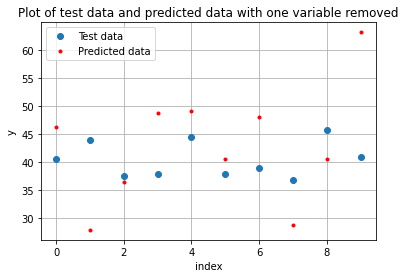

In [64]:
#plot test data too with one variable removed
plt.plot(y_test,'o', label = "Test data")
plt.plot(h_test,'r.', label = "Predicted data")

plt.legend()
plt.xlabel("index")
plt.ylabel("y")
plt.title("Plot of test data and predicted data with one variable removed")

plt.grid()
plt.show()

Theta:  [-5.83513514 34.93783784]

Predicted values (Evaluated hypothesis function) for training data:  [29.1027027  29.1027027  29.1027027  29.1027027  29.1027027  29.1027027
 29.1027027  29.1027027  81.50945946 81.50945946 29.1027027  29.1027027
 29.1027027  29.1027027  29.1027027  29.1027027  46.57162162 46.57162162]

Predicted values (Evaluated hypothesis function) for test data:  [46.57162162 29.1027027  29.1027027  46.57162162 46.57162162 46.57162162
 46.57162162 29.1027027  46.57162162 46.57162162]

Train error:  107.54094594594605
Test error:  316.1574242147554


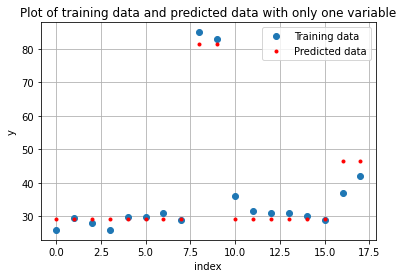

In [66]:
#Taking only one variable with most impact

x_train = data[0:row-10,1:col-1]
y_train = data[0:row-10,col-1]

#taking only one variable
x_train = x_train[:,1]
#x_train = x_train[:,5]

x_test = data[row-10:row, 1:col-1]
y_test = data[row-10:row, col-1]
#x_test = np.vstack([x_test[:,1], x_test[:,5]]).T
x_test = x_test[:,1]
#x_test = x_test[:,5]

#Form X and Y matrices for normal equation
X = np.vstack([np.ones(x_train.shape[0]), x_train.T]).T
Y = y_train

#Find theta array
theta = (np.linalg.inv((X.T).dot(X))).dot((X.T).dot(Y))
print("Theta: ", theta)

#Calculate the hypothesis function based on training data
h_train = theta.dot(X.T)
print("\nPredicted values (Evaluated hypothesis function) for training data: ", h_train)

#Calculate the hypothesis function based on test data
X_test = np.vstack([np.ones(x_test.shape[0]), x_test.T]).T
h_test = theta.dot(X_test.T)
print("\nPredicted values (Evaluated hypothesis function) for test data: ", h_test)

#Calculate average least squares error (cost function) for training data
J_train = 0.5 * np.sum((h_train - y_train)**2)
print("\nTrain error: ", J_train)

#Calculate average least squares error (cost function) for test data
J_test = 0.5 * np.sum((h_test - y_test)**2)
print("Test error: ",J_test)

plt.plot(y_train,'o', label = "Training data")
plt.plot(h_train,'r.', label = "Predicted data")

plt.legend()
plt.xlabel("index")
plt.ylabel("y")
plt.title("Plot of training data and predicted data with only one variable")

plt.grid()
plt.show()

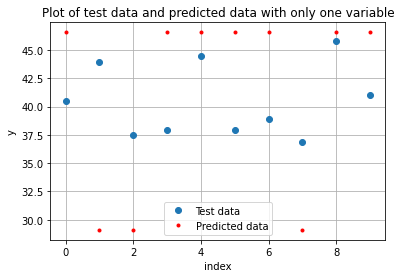

In [67]:
#plot test data too
plt.plot(y_test,'o', label = "Test data")
plt.plot(h_test,'r.', label = "Predicted data")

plt.legend()
plt.xlabel("index")
plt.ylabel("y")
plt.title("Plot of test data and predicted data with only one variable")

plt.grid()
plt.show()